~~~~~ Linear Kernel Results ~~~~~
PV -> MAE: 0.09, RMSE: 0.11, R²: 0.885, Adjusted R²: 0.885
Wind -> MAE: 0.14, RMSE: 0.17, R²: 0.476, Adjusted R²: 0.476


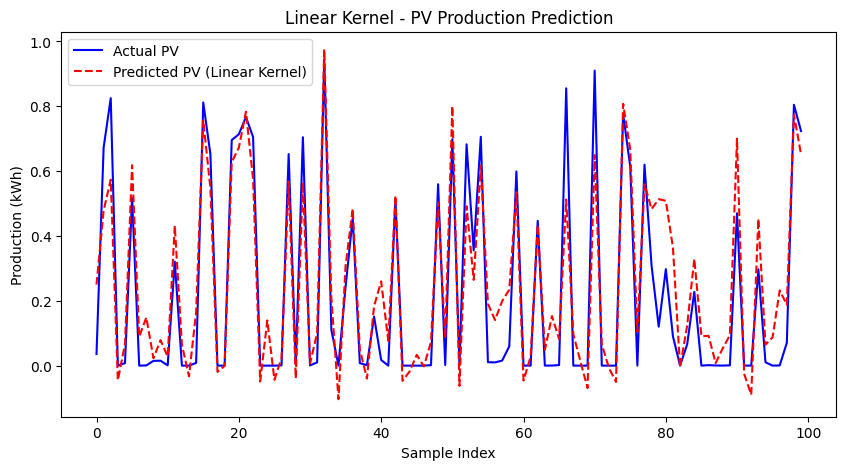

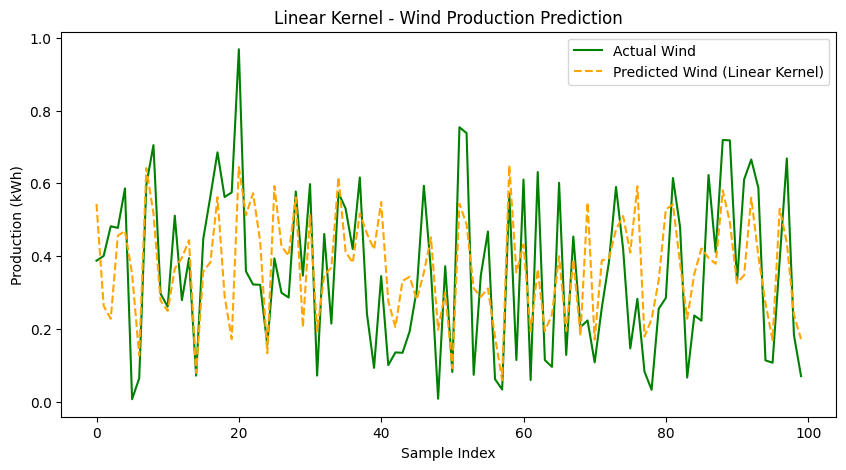

~~~~~ Polynomial Kernel Results ~~~~~
PV -> MAE: 0.12, RMSE: 0.13, R²: 0.830, Adjusted R²: 0.830
Wind -> MAE: 0.13, RMSE: 0.15, R²: 0.559, Adjusted R²: 0.558


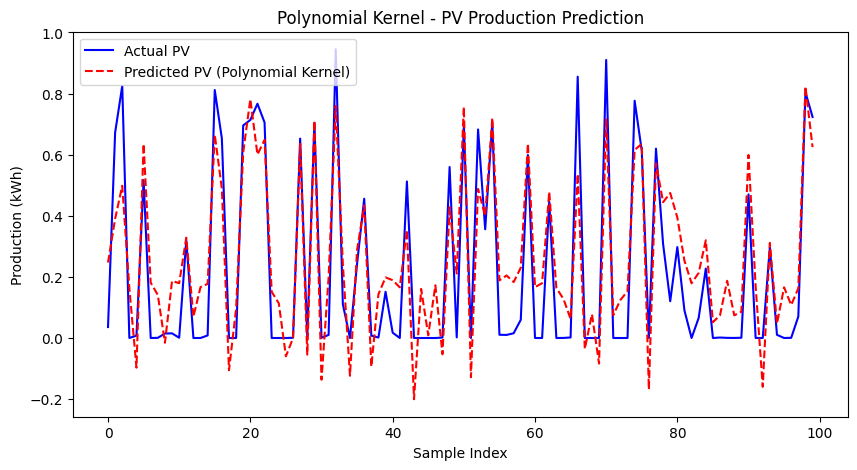

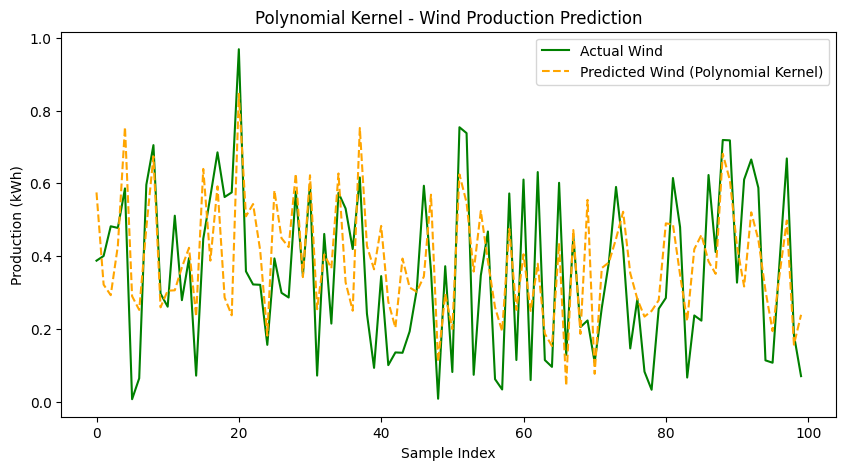

~~~~~ RBF Kernel Results ~~~~~
PV -> MAE: 0.08, RMSE: 0.10, R²: 0.910, Adjusted R²: 0.910
Wind -> MAE: 0.11, RMSE: 0.13, R²: 0.671, Adjusted R²: 0.671


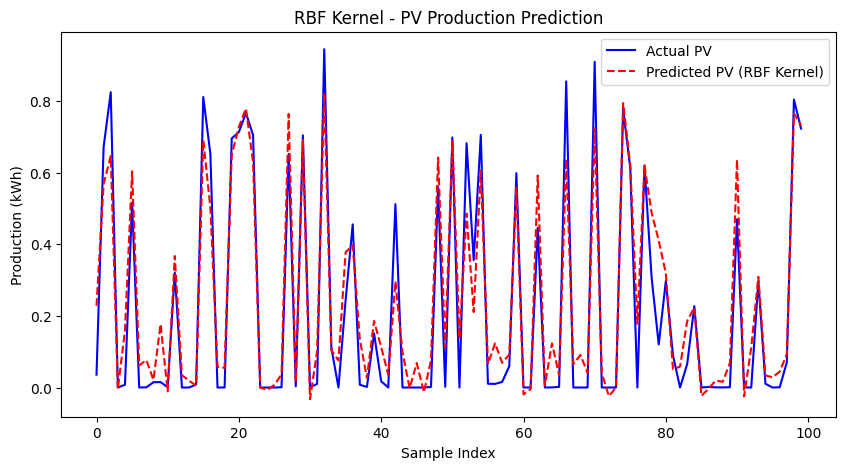

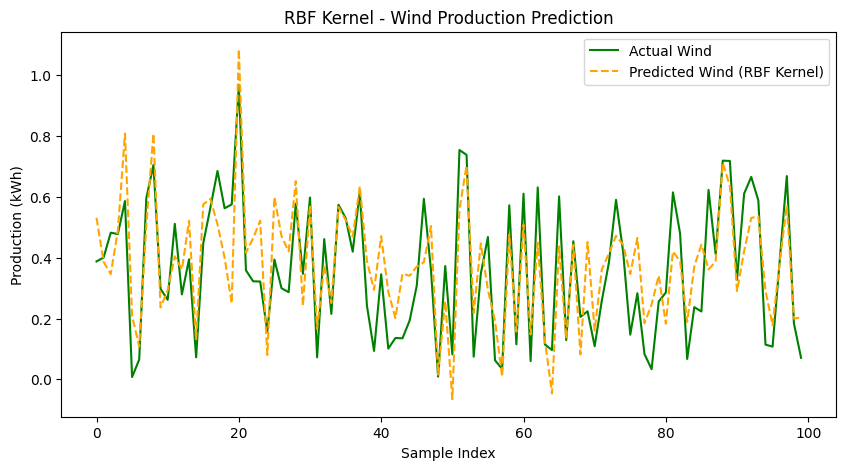

~~~~~ Sigmoid Kernel Results ~~~~~
PV -> MAE: 2442.26, RMSE: 4213.81, R²: -166055115.404, Adjusted R²: -166169095.750
Wind -> MAE: 2442.29, RMSE: 4213.67, R²: -338586905.100, Adjusted R²: -338819311.385


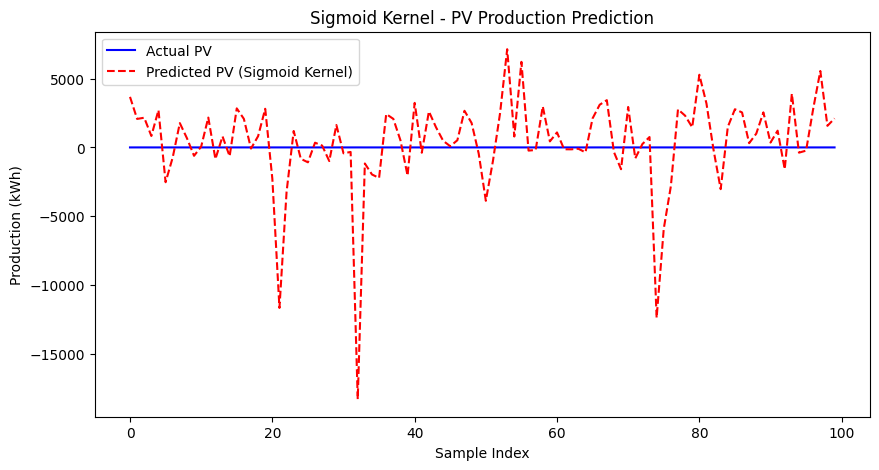

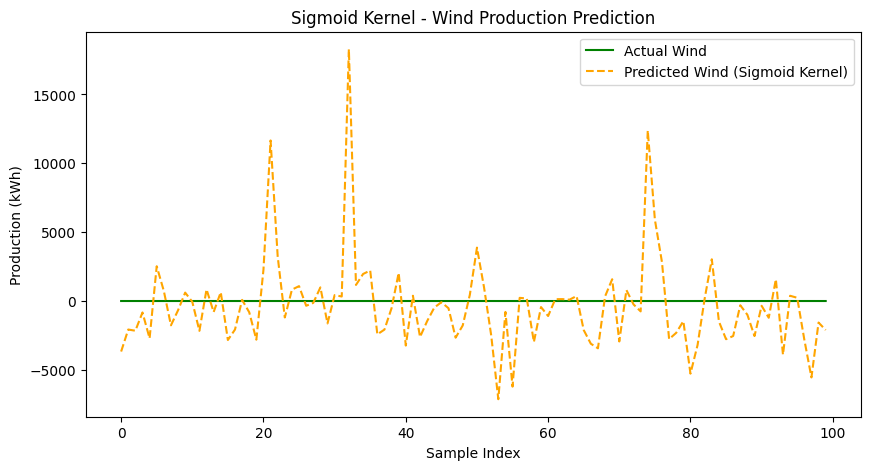

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt

# Step 2: Load the saved training and testing data
train_data = pd.read_csv("train_multi_output.csv")
test_data = pd.read_csv("test_multi_output.csv")

# Step 3: Separate features (X) and target variables (y)
X_train = train_data[['Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI', 'Wind_speed', 'Humidity', 'Temperature']]
y_train = train_data[['PV_production', 'Wind_production']]

X_test = test_data[['Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI', 'Wind_speed', 'Humidity', 'Temperature']]
y_test = test_data[['PV_production', 'Wind_production']]

# Step 4: Feature Scaling (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a function to evaluate and plot results
def evaluate_and_plot(model, X_test_scaled, y_test, y_pred, model_name):
    mae_pv = mean_absolute_error(y_test['PV_production'], y_pred[:, 0])
    mae_wind = mean_absolute_error(y_test['Wind_production'], y_pred[:, 1])
    rmse_pv = np.sqrt(mean_squared_error(y_test['PV_production'], y_pred[:, 0]))
    rmse_wind = np.sqrt(mean_squared_error(y_test['Wind_production'], y_pred[:, 1]))
    r2_pv = r2_score(y_test['PV_production'], y_pred[:, 0])
    r2_wind = r2_score(y_test['Wind_production'], y_pred[:, 1])
    
    # Adjusted R²
    n = X_test_scaled.shape[0]
    p = X_test_scaled.shape[1]
    adjusted_r2_pv = 1 - ((1 - r2_pv) * (n - 1) / (n - p - 1))
    adjusted_r2_wind = 1 - ((1 - r2_wind) * (n - 1) / (n - p - 1))
    
    print(f"~~~~~ {model_name} Results ~~~~~")
    print(f"PV -> MAE: {mae_pv:.2f}, RMSE: {rmse_pv:.2f}, R²: {r2_pv:.3f}, Adjusted R²: {adjusted_r2_pv:.3f}")
    print(f"Wind -> MAE: {mae_wind:.2f}, RMSE: {rmse_wind:.2f}, R²: {r2_wind:.3f}, Adjusted R²: {adjusted_r2_wind:.3f}")
    
    # Plot PV Production
    plt.figure(figsize=(10,5))
    plt.plot(y_test['PV_production'].values[:100], label='Actual PV', color='blue')
    plt.plot(y_pred[:100, 0], label=f'Predicted PV ({model_name})', linestyle='--', color='red')
    plt.title(f'{model_name} - PV Production Prediction')
    plt.xlabel('Sample Index')
    plt.ylabel('Production (kWh)')
    plt.legend()
    plt.show()

    # Plot Wind Production
    plt.figure(figsize=(10,5))
    plt.plot(y_test['Wind_production'].values[:100], label='Actual Wind', color='green')
    plt.plot(y_pred[:100, 1], label=f'Predicted Wind ({model_name})', linestyle='--', color='orange')
    plt.title(f'{model_name} - Wind Production Prediction')
    plt.xlabel('Sample Index')
    plt.ylabel('Production (kWh)')
    plt.legend()
    plt.show()

# Function to run and evaluate SVR with different kernels
def run_svr_with_kernel(kernel_type, kernel_name):
    svr = SVR(kernel=kernel_type, C=10, gamma='scale', epsilon=0.2)
    svr_model = MultiOutputRegressor(svr)
    svr_model.fit(X_train_scaled, y_train)
    y_pred = svr_model.predict(X_test_scaled)
    
    # Evaluate and plot results
    evaluate_and_plot(svr_model, X_test_scaled, y_test, y_pred, kernel_name)

# 1. Linear Kernel
run_svr_with_kernel('linear', 'Linear Kernel')

# 2. Polynomial Kernel
run_svr_with_kernel('poly', 'Polynomial Kernel')

# 3. Radial Basis Function (RBF) Kernel
run_svr_with_kernel('rbf', 'RBF Kernel')

# 4. Sigmoid Kernel
run_svr_with_kernel('sigmoid', 'Sigmoid Kernel')